In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Deth'
raceDate = '17/9/2023'
surface = 'Tarmac'
competition = 'Championship'

link = 'https://www.ewrc-results.com/results/85017-rally-deth-2023/?s='
startat, no_ss=437919, int(4)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#3,Tsolakidis Soc,C1,10:33.48,-,112.0,1,Deth,17/9/2023,Tarmac,Championship,1
1,2,#4,Aligizakis E.,C1,10:44.91,+11.43 + 11.43,110.0 0.58,1,Deth,17/9/2023,Tarmac,Championship,2
2,3,#2,Anapoliotakis,C1,10:45.55,+12.07 + 0.64,109.9 0.61,1,Deth,17/9/2023,Tarmac,Championship,3
3,4,#5,Ieremiadis Sot,C1,11:03.70,+30.22 + 18.15,106.9 1.53,1,Deth,17/9/2023,Tarmac,Championship,4
4,5,#12,Brozos Fotis,C3 F2,11:22.49,+49.01 + 18.79,103.9 2.49,1,Deth,17/9/2023,Tarmac,Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,27,#41,Rakitzis Grigo,C5 F2,18:20.68,+4:25.47 + 12.65,82.1 10.6,4,Deth,17/9/2023,Tarmac,Championship,27
27,28,#46,Tsakiroglou A.,C3 F2,19:59.75,+6:04.54 + 1:39.07,75.3 14.5,4,Deth,17/9/2023,Tarmac,Championship,28
28,29,#49,Koukas Stavros,C3 F2,20:22.50,+6:27.29 + 22.75,73.9 15.4,4,Deth,17/9/2023,Tarmac,Championship,29
29,30,#50,Anastassovitis,C6 F2,20:57.70,+7:02.49 + 35.20,71.8 16.8,4,Deth,17/9/2023,Tarmac,Championship,30


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


CalledProcessError: Command '['--enable-logging', '--disable-gpu', '--headless', '--crash-dumps-dir=/home/teneatis/tmp9unydc1f', '--force-device-scale-factor=1', '--window-size=1400,900', '--hide-scrollbars', '--screenshot=/home/teneatis/tmp9unydc1f/temp.png', '/home/teneatis/tmp9unydc1f/temp.html']' returned non-zero exit status 64.

In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tsolakidis Soc,C1,1,Deth,17/9/2023,Tarmac,Championship,1,633.48
1,Aligizakis E.,C1,1,Deth,17/9/2023,Tarmac,Championship,2,644.91
2,Anapoliotakis,C1,1,Deth,17/9/2023,Tarmac,Championship,3,645.55
3,Ieremiadis Sot,C1,1,Deth,17/9/2023,Tarmac,Championship,4,663.70
4,Brozos Fotis,C3 F2,1,Deth,17/9/2023,Tarmac,Championship,5,682.49
...,...,...,...,...,...,...,...,...,...
26,Rakitzis Grigo,C5 F2,4,Deth,17/9/2023,Tarmac,Championship,27,1100.68
27,Tsakiroglou A.,C3 F2,4,Deth,17/9/2023,Tarmac,Championship,28,1199.75
28,Koukas Stavros,C3 F2,4,Deth,17/9/2023,Tarmac,Championship,29,1222.50
29,Anastassovitis,C6 F2,4,Deth,17/9/2023,Tarmac,Championship,30,1257.70


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race ss          
Deth 1     633.48
     2     830.24
     3     635.88
     4     835.21

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsolakidis Soc,C1,1,Deth,17/9/2023,Tarmac,Championship,1,633.48,633.48,0.00,0.000000,01
1,Aligizakis E.,C1,1,Deth,17/9/2023,Tarmac,Championship,2,644.91,633.48,11.43,1.804319,01
2,Anapoliotakis,C1,1,Deth,17/9/2023,Tarmac,Championship,3,645.55,633.48,12.07,1.905348,01
3,Ieremiadis Sot,C1,1,Deth,17/9/2023,Tarmac,Championship,4,663.70,633.48,30.22,4.770474,01
4,Brozos Fotis,C3 F2,1,Deth,17/9/2023,Tarmac,Championship,5,682.49,633.48,49.01,7.736629,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Rakitzis Grigo,C5 F2,4,Deth,17/9/2023,Tarmac,Championship,27,1100.68,835.21,265.47,31.784821,04
139,Tsakiroglou A.,C3 F2,4,Deth,17/9/2023,Tarmac,Championship,28,1199.75,835.21,364.54,43.646508,04
140,Koukas Stavros,C3 F2,4,Deth,17/9/2023,Tarmac,Championship,29,1222.50,835.21,387.29,46.370374,04
141,Anastassovitis,C6 F2,4,Deth,17/9/2023,Tarmac,Championship,30,1257.70,835.21,422.49,50.584883,04


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsolakidis Soc,C1,1,Deth,17/9/2023,Tarmac,Championship,1,633.48,633.48,0.00,0.000000,01
1,Aligizakis E.,C1,1,Deth,17/9/2023,Tarmac,Championship,2,644.91,633.48,11.43,1.804319,01
2,Anapoliotakis,C1,1,Deth,17/9/2023,Tarmac,Championship,3,645.55,633.48,12.07,1.905348,01
3,Ieremiadis Sot,C1,1,Deth,17/9/2023,Tarmac,Championship,4,663.70,633.48,30.22,4.770474,01
6,Gerodimos Gior,C2,1,Deth,17/9/2023,Tarmac,Championship,7,685.29,633.48,51.81,8.178632,01
9,Peroulakis Geo,C2,1,Deth,17/9/2023,Tarmac,Championship,10,690.61,633.48,57.13,9.018438,01
10,Argiriou Giorg,C2,1,Deth,17/9/2023,Tarmac,Championship,11,693.75,633.48,60.27,9.514113,01
12,Sotiriadis Nik,C2,1,Deth,17/9/2023,Tarmac,Championship,13,709.93,633.48,76.45,12.068258,01
23,Tassos Vassili,C2,1,Deth,17/9/2023,Tarmac,Championship,24,763.33,633.48,129.85,20.497885,01
34,Archangelidis,C2,1,Deth,17/9/2023,Tarmac,Championship,35,880.78,633.48,247.30,39.038328,01


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race              Deth                        
SS.                 01      02      03      04
Crew                                          
Aligizakis E.    11.43   21.76    6.03    7.02
Anapoliotakis    12.07   10.60    6.58    5.80
Archangelidis   247.30     NaN     NaN     NaN
Argiriou Giorg   60.27   61.55   53.44   47.09
Gerodimos Gior   51.81   64.30   45.27   60.19
Ieremiadis Sot   30.22   48.43   20.53   26.47
Peroulakis Geo   57.13   66.94   43.64   50.83
Sotiriadis Nik   76.45   89.48   64.65   81.44
Tassos Vassili  129.85  148.26  114.48  135.64
Tsolakidis Soc    0.00    0.00    0.00    0.00

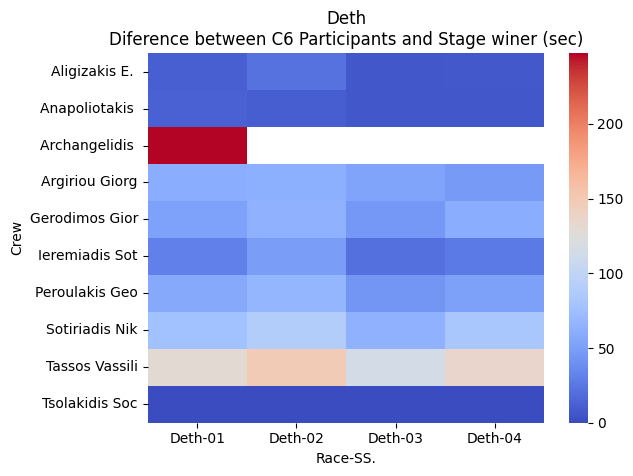

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

/home/teneatis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teneatis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teneatis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


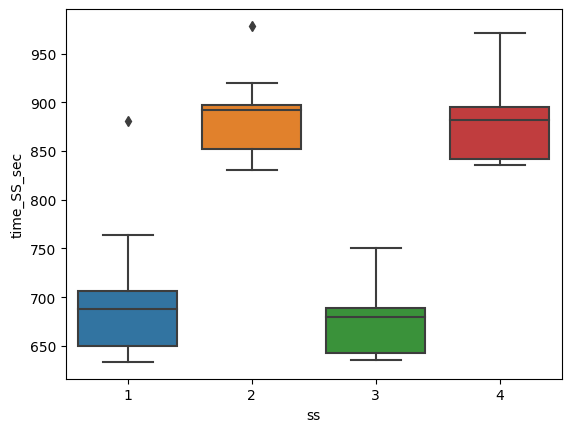

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

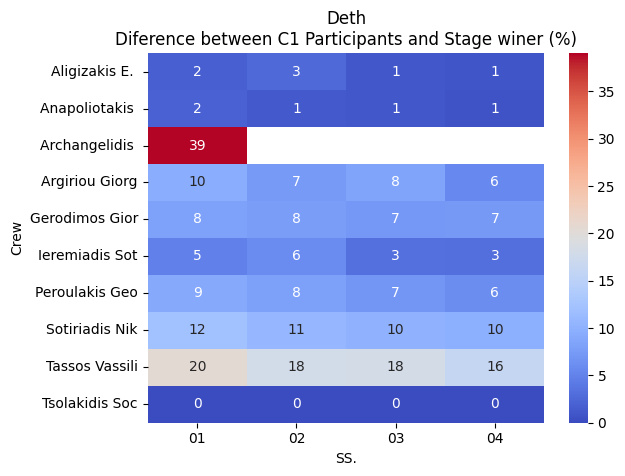

In [16]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")